<font color='blue'> # **Este projeto fictício analisa dados históricos de vendas de uma empresa de eletrônicos com o objetivo de prever as vendas para o ano de 2016, utilizando registros dos últimos quatro anos. Durante o estudo, foi aplicada a transformação logarítmica (Log Transform) para normalizar os dados, mantendo os outliers, e a técnica de diferenciação (Differencing) para garantir que a série temporal fosse estacionária. 
Para realizar a previsão de vendas, foi utilizado o algoritmo Auto-ARIMA (SARIMA), que é capaz de capturar tanto as tendências quanto as sazonalidades presentes na série temporal, garantindo uma modelagem robusta e adequada ao comportamento dos dados.** </font>


## **Carregando os Dados**

In [3]:
#Import dos pacotes numpy e pandas
import numpy as np
import pandas as pd

In [4]:
#Abrindo o arquivo com o pandas
path = ('Dados_Comerciais.xlsx')
df = pd.read_excel(path)
df = pd.DataFrame(df)
df.head()

,ID-Produto,Produto,Categoria,Segmento,Fabricante,Loja,Cidade,Estado,Vendedor,ID-Vendedor,Comissão (Percentual),Data Venda,ValorVenda,Custo
0,SKU-0000001,LG K10 TV Power,Celulares,Corporativo,LG,SP8821,São Paulo,São Paulo,Ana Teixeira,1009,2,2012-10-04,679.00,345
1,SKU-0000002,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Josias Silva,1006,3,2012-01-01,832.00,712
2,SKU-0000003,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Josias Silva,1006,2,2012-02-02,790.00,390
3,SKU-0000004,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Mateus Gonçalves,1003,3,2012-03-03,765.32,200
4,SKU-0000005,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Electrolux,SP8821,São Paulo,São Paulo,Artur Moreira,1004,5,2012-04-04,459.89,234


In [5]:
# Convertendo a coluna 'data' para o tipo datetime 
df['Data Venda'] = pd.to_datetime(df['Data Venda'])

In [6]:
df

,ID-Produto,Produto,Categoria,Segmento,Fabricante,Loja,Cidade,Estado,Vendedor,ID-Vendedor,Comissão (Percentual),Data Venda,ValorVenda,Custo
0,SKU-0000001,LG K10 TV Power,Celulares,Corporativo,LG,SP8821,São Paulo,São Paulo,Ana Teixeira,1009,2,2012-10-04,679.00,345
1,SKU-0000002,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Josias Silva,1006,3,2012-01-01,832.00,712
2,SKU-0000003,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Josias Silva,1006,2,2012-02-02,790.00,390
3,SKU-0000004,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Mateus Gonçalves,1003,3,2012-03-03,765.32,200
4,SKU-0000005,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Electrolux,SP8821,São Paulo,São Paulo,Artur Moreira,1004,5,2012-04-04,459.89,234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,SKU-0000453,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,R1295,Rio de Janeiro,Rio de Janeiro,André Pereira,1002,2,2015-09-23,850.00,120
453,SKU-0000454,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,R1295,Rio de Janeiro,Rio de Janeiro,André Pereira,1002,2,2015-10-24,678.00,120
454,SKU-0000455,Morotola Moto G5,Celulares,Doméstico,Motorola,R1295,Rio de Janeiro,Rio de Janeiro,Aline Sutter,1008,2,2015-11-25,1230.00,120
455,SKU-0000456,Geladeira Duplex,Eletrodomésticos,Doméstico,LG,R1295,Rio de Janeiro,Rio de Janeiro,André Pereira,1002,2,2015-11-26,1234.00,120


## **Análise Exploratória**

In [8]:
#Inforando o número de linhas e colunas
df.shape

(457, 14)

In [9]:
#Informando os tipos de dados
df.dtypes

ID-Produto                       object
Produto                          object
Categoria                        object
Segmento                         object
Fabricante                       object
Loja                             object
Cidade                           object
Estado                           object
Vendedor                         object
ID-Vendedor                       int64
Comissão (Percentual)             int64
Data Venda               datetime64[ns]
ValorVenda                      float64
Custo                             int64
dtype: object

In [10]:
#Selecionando apenas duas colunas do df
df_Ajuste = df[['Data Venda','ValorVenda']]

In [11]:
df_Ajuste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Data Venda  457 non-null    datetime64[ns]
 1   ValorVenda  457 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.3 KB


## **Verificando os valores de outliers**

In [13]:
# Calculando Q1, Q3 e IQR
Q1 = df_Ajuste['ValorVenda'].quantile(0.25)
Q3 = df_Ajuste['ValorVenda'].quantile(0.75)
IQR = Q3 - Q1

In [14]:
# Definindos os limites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

In [15]:
# Identificando os outliers com a criação da coluna: Outlier
df_Ajuste = df_Ajuste.copy()  # Garante que você está trabalhando com uma cópia
df_Ajuste.loc[:, 'Outlier'] = (df_Ajuste['ValorVenda'] < limite_inferior) | (df_Ajuste['ValorVenda'] > limite_superior)
df_Ajuste

,Data Venda,ValorVenda,Outlier
0,2012-10-04,679.00,False
1,2012-01-01,832.00,False
2,2012-02-02,790.00,False
3,2012-03-03,765.32,False
4,2012-04-04,459.89,False
...,...,...,...
452,2015-09-23,850.00,False
453,2015-10-24,678.00,False
454,2015-11-25,1230.00,False
455,2015-11-26,1234.00,False


In [16]:
# Conta quantos valores são ou não outliers
df_Ajuste['Outlier'].value_counts()

Outlier
False    442
True      15
Name: count, dtype: int64

In [17]:
# Filtra apenas as linhas que são outliers
outliers = df_Ajuste[df_Ajuste['Outlier'] == True]
outliers

,Data Venda,ValorVenda,Outlier
147,2013-07-21,3999.0,True
150,2013-10-24,3999.0,True
154,2014-10-04,3999.0,True
156,2014-02-02,3999.0,True
157,2014-03-03,3999.0,True
158,2014-04-04,3999.0,True
159,2014-05-04,3999.0,True
169,2015-02-02,3999.0,True
170,2015-03-02,3999.0,True
171,2015-04-02,3999.0,True


In [18]:
# Filtra linhas que não são outliers
nao_outliers = df_Ajuste[df_Ajuste['Outlier'] == False]
nao_outliers

,Data Venda,ValorVenda,Outlier
0,2012-10-04,679.00,False
1,2012-01-01,832.00,False
2,2012-02-02,790.00,False
3,2012-03-03,765.32,False
4,2012-04-04,459.89,False
...,...,...,...
452,2015-09-23,850.00,False
453,2015-10-24,678.00,False
454,2015-11-25,1230.00,False
455,2015-11-26,1234.00,False


In [19]:
#Visualização de Gráficos
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 4

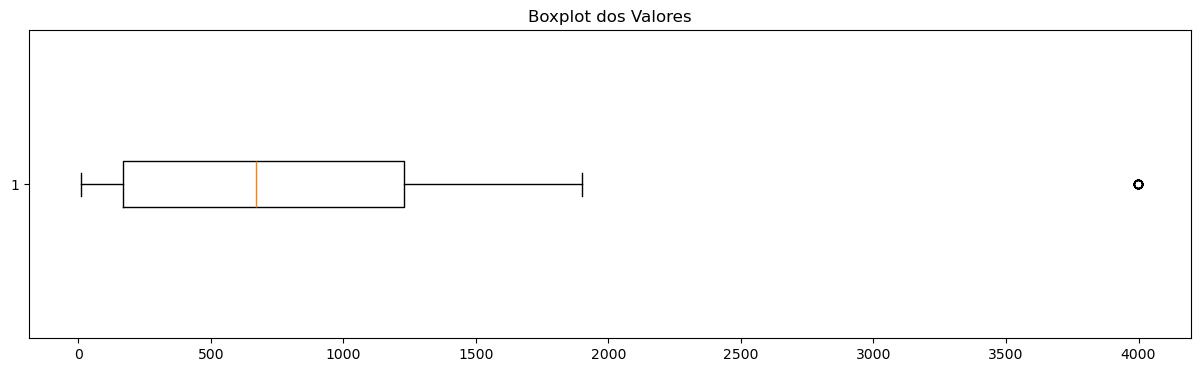

In [20]:

plt.boxplot(df_Ajuste['ValorVenda'], vert=False)
plt.title('Boxplot dos Valores')
plt.show()

## **Criação da Série**

In [22]:
# Converter o DataFrame em uma série temporal com a coluna Data Venda como índice
serie_temporal1 = df_Ajuste.set_index('Data Venda')['ValorVenda']

In [23]:
print(serie_temporal1.index)  # Verifica se o índice está correto

DatetimeIndex(['2012-10-04', '2012-01-01', '2012-02-02', '2012-03-03',
               '2012-04-04', '2012-05-04', '2012-06-04', '2012-07-04',
               '2012-08-04', '2012-09-04',
               ...
               '2015-05-18', '2015-05-19', '2015-06-20', '2015-07-21',
               '2015-07-22', '2015-09-23', '2015-10-24', '2015-11-25',
               '2015-11-26', '2015-11-27'],
              dtype='datetime64[ns]', name='Data Venda', length=457, freq=None)


In [24]:
type(serie_temporal1)

pandas.core.series.Series

In [25]:
serie_temporal1

Data Venda
2012-10-04     679.00
2012-01-01     832.00
2012-02-02     790.00
2012-03-03     765.32
2012-04-04     459.89
               ...   
2015-09-23     850.00
2015-10-24     678.00
2015-11-25    1230.00
2015-11-26    1234.00
2015-11-27    1234.00
Name: ValorVenda, Length: 457, dtype: float64

In [26]:
# Fornece a frequência da série temporal (Mensal, neste caso) acumulado.
serie_temporal1 = serie_temporal1.resample('ME').sum()
serie_temporal1

Data Venda
2012-01-31     2636.87
2012-02-29     2258.12
2012-03-31     2356.22
2012-04-30     3150.76
2012-05-31     2500.10
2012-06-30     2369.81
2012-07-31     3029.87
2012-08-31     3100.12
2012-09-30     5022.90
2012-10-31     3244.87
2012-11-30     4108.12
2012-12-31     3725.98
2013-01-31     7311.87
2013-02-28     7893.12
2013-03-31     8102.90
2013-04-30     8009.87
2013-05-31     8106.43
2013-06-30     7416.80
2013-07-31    11007.87
2013-08-31     4757.14
2013-09-30     5546.13
2013-10-31    10263.10
2013-11-30     8537.21
2013-12-31     6466.12
2014-01-31     5390.00
2014-02-28     7813.00
2014-03-31     6355.00
2014-04-30     6365.00
2014-05-31     6360.00
2014-06-30     3399.00
2014-07-31     3395.00
2014-08-31     2252.00
2014-09-30     2496.90
2014-10-31     7715.00
2014-11-30     4918.00
2014-12-31     6863.12
2015-01-31    10305.57
2015-02-28    14372.22
2015-03-31    17812.00
2015-04-30    16902.45
2015-05-31    19898.00
2015-06-30    13103.87
2015-07-31    14581.00


In [27]:
#Calculando a média anual
media_valor_venda = serie_temporal1.mean()
print('MÉDIA: {:.2f}'.format(media_valor_venda))

MÉDIA: 7485.61


In [28]:
# Confirma se há valores nulos
print(serie_temporal1.isnull().sum())  

0


In [29]:
# Substituindo vírgulas por pontos e convertendo para numérico
serie_temporal1 = serie_temporal1.replace({',': ''}, regex=True)  # Remove vírgulas de milhares, se necessário
serie_temporal1 = pd.to_numeric(serie_temporal1, errors='coerce')  # Converte para numérico
# Confirmando a conversão
print("Último valor de serie_temporal (corrigido):", serie_temporal1.iloc[-1])

Último valor de serie_temporal (corrigido): 8026.0


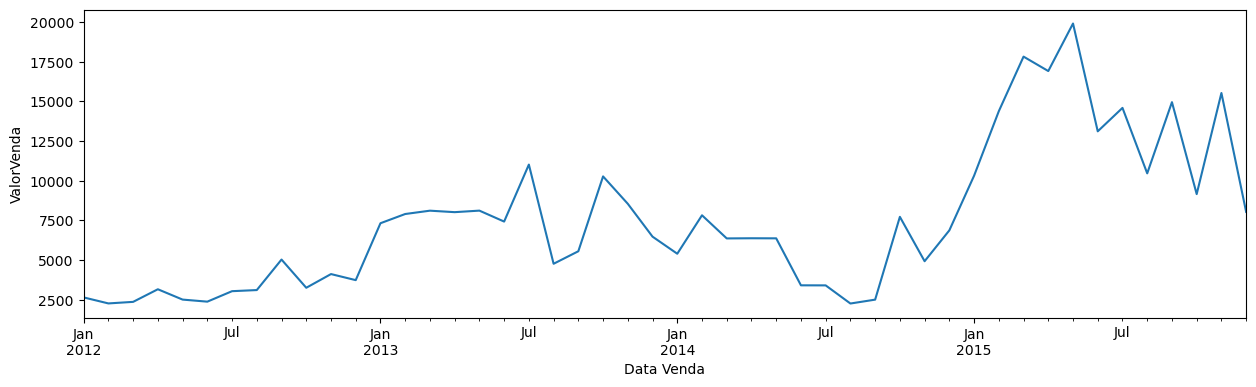

In [30]:
serie_temporal1.plot()
plt.xlabel('Data Venda')
plt.ylabel('ValorVenda')
plt.show()

## **Verificando se os dados são normalizados**

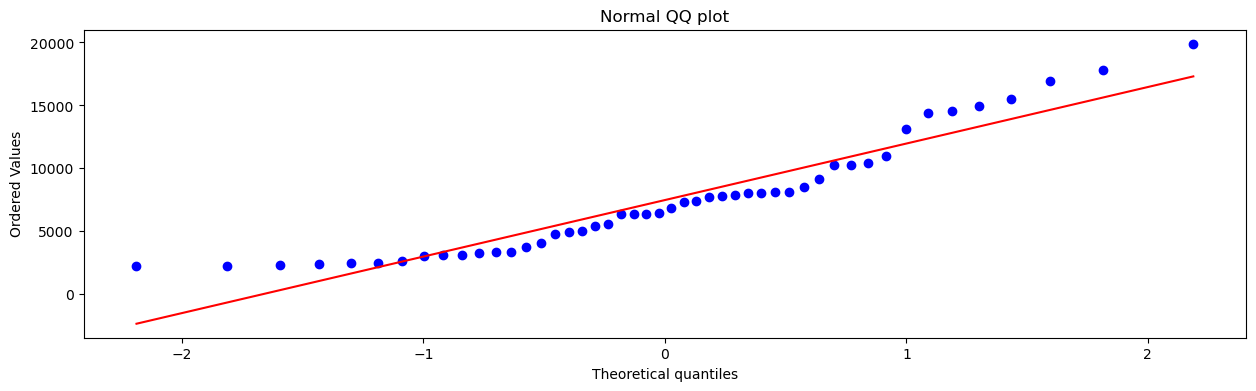

In [32]:
from scipy import stats
import matplotlib.pyplot as plt

stats.probplot(serie_temporal1, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

**Teste Shapiro-Wilk**

CRITÉRIO**

NÍVEL DE SIGNIFICÂNCIA DE 0,05 ou 5% (MAIS UTILIZADO)

QUANDO p > 0,05 (diicaoriburo no**rmal).

In [34]:
# Executando o teste de Shapiro-Wilk para verificar a normalidade
e, p = stats.shapiro(serie_temporal1)
print('Estatística de teste: {}'.format(e))
print('p-valor: {}'.format(p))
# Avaliando o p-valor para decidir sobre a normalidade dos dados
if p > 0.05:
    print("Dados seguem uma distribuição normal")
else:
    print("Dados não seguem uma distribuição normal")

Estatística de teste: 0.8993790704414903
p-valor: 0.0006004295896386687
Dados não seguem uma distribuição normal


**Teste de Estacionaridade**

In [36]:
import statsmodels.tsa.stattools
import statsmodels.tsa.stattools as ts

**Teste KPSS (Kwiatkowski-Phillips-Schmidt-Shin)**

Ha = não é estacionária: estatística do teste > valor crítico.

Ho = é estacionária: estatística do teste <= valor crítico.

In [38]:
# Realizando o teste KPSS
kpss_result = ts.kpss(serie_temporal1)

# Exibindo os resultados do teste
print('Estatística do teste: {:.4f}'.format(kpss_result[0]))
print('p_valor: {:.4f}'.format(kpss_result[1]))
print('Valores Críticos:')

# Iterando pelos valores críticos e verificando se a série é estacionária
for chave, valor in kpss_result[3].items():
    if kpss_result[0] > valor:
        print("Não é estacionária para o nível de significância de: {}=> {:.4f}".format(chave, valor))
    else:
        print("É estacionária para o nível de significância de: {}=> {:.4f}".format(chave, valor))

Estatística do teste: 0.6053
p_valor: 0.0222
Valores Críticos:
Não é estacionária para o nível de significância de: 10%=> 0.3470
Não é estacionária para o nível de significância de: 5%=> 0.4630
Não é estacionária para o nível de significância de: 2.5%=> 0.5740
É estacionária para o nível de significância de: 1%=> 0.7390


**Teste df (Dickey Fuller)**

Ho = não é estacionária: estatística do teste > valor críti.

Ha = é estacionária: estatística do teste <= valor crítico.

In [40]:
# Realizando o teste Dickey-Fuller
from statsmodels.tsa.stattools import adfuller

df_result = adfuller(serie_temporal1)

# Exibindo os resultados do teste
print('Estatística do teste: {:.4f}'.format(df_result[0]))
print('p_valor: {:.4f}'.format(df_result[1]))
print('Valores Críticos:')

# Iterando pelos valores críticos e verificando se a série é estacionária
for chave, valor in df_result[4].items():
    if df_result[0] < valor:  
        print("É estacionária para o nível de significância de: {} => {:.4f}".format(chave, valor))
    else:
        print("Não é estacionária para o nível de significância de: {} => {:.4f}".format(chave, valor))


Estatística do teste: -1.8603
p_valor: 0.3509
Valores Críticos:
Não é estacionária para o nível de significância de: 1% => -3.5848
Não é estacionária para o nível de significância de: 5% => -2.9283
Não é estacionária para o nível de significância de: 10% => -2.6023


## **Análise e Preparação da Série**

**Decomposição**

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [44]:
decomposicao = seasonal_decompose(serie_temporal1)

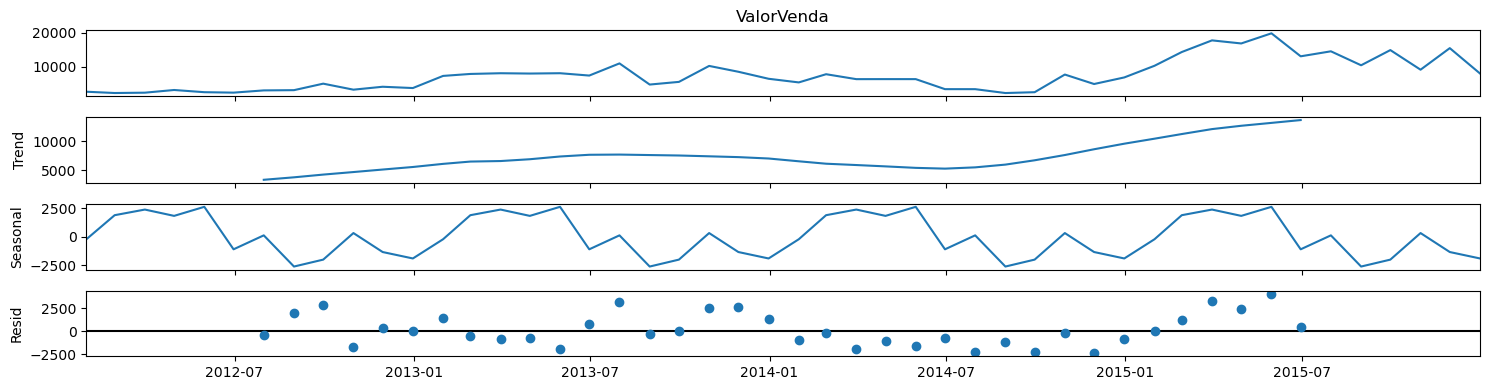

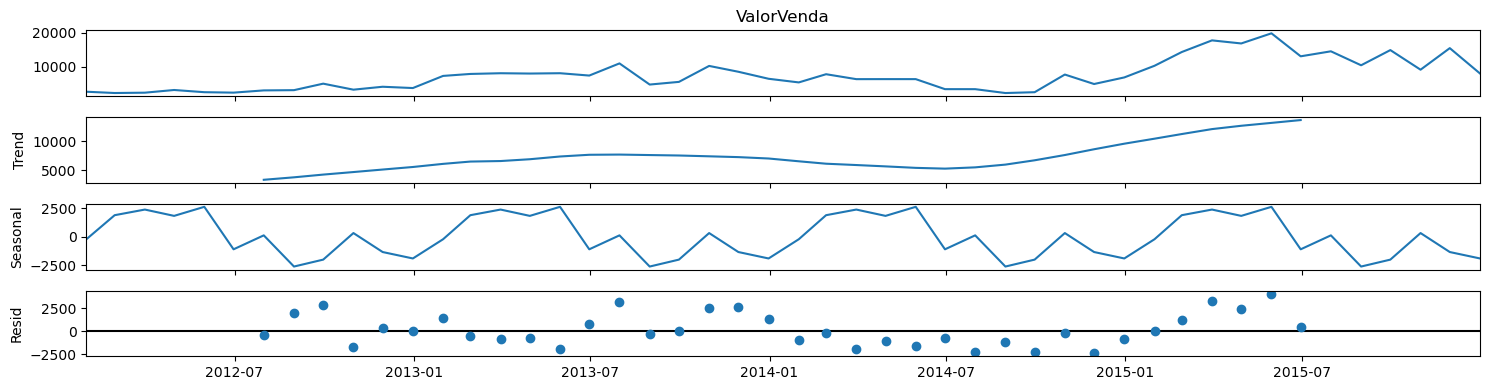

In [45]:
decomposicao.plot()

## **Realizando a normalidade e transformação dos dados**

In [47]:
# Transformação por Log Transform (Diminui variância e melhorar normalidade)
serie_temporal2 = np.log(serie_temporal1)
serie_temporal2

Data Venda
2012-01-31    7.877348
2012-02-29    7.722288
2012-03-31    7.764814
2012-04-30    8.055399
2012-05-31    7.824086
2012-06-30    7.770565
2012-07-31    8.016275
2012-08-31    8.039196
2012-09-30    8.521763
2012-10-31    8.084831
2012-11-30    8.320721
2012-12-31    8.223085
2013-01-31    8.897254
2013-02-28    8.973747
2013-03-31    8.999977
2013-04-30    8.988430
2013-05-31    9.000413
2013-06-30    8.911503
2013-07-31    9.306366
2013-08-31    8.467402
2013-09-30    8.620856
2013-10-31    9.236310
2013-11-30    9.052190
2013-12-31    8.774332
2014-01-31    8.592301
2014-02-28    8.963544
2014-03-31    8.756997
2014-04-30    8.758570
2014-05-31    8.757784
2014-06-30    8.131237
2014-07-31    8.130059
2014-08-31    7.719574
2014-09-30    7.822805
2014-10-31    8.950922
2014-11-30    8.500657
2014-12-31    8.833917
2015-01-31    9.240440
2015-02-28    9.573052
2015-03-31    9.787628
2015-04-30    9.735214
2015-05-31    9.898375
2015-06-30    9.480663
2015-07-31    9.587475


In [48]:
# Executando o teste de Shapiro-Wilk para verificar a normalidade
e, p = stats.shapiro(serie_temporal2)
print('Estatística de teste: {}'.format(e))
print('p-valor: {}'.format(p))

# Avaliando o p-valor para decidir sobre a normalidade dos dados
if p > 0.05:
    print("Dados seguem uma distribuição normal")
else:
    print("Dados não seguem uma distribuição normal")

Estatística de teste: 0.9552471683592688
p-valor: 0.06489007784534095
Dados seguem uma distribuição normal


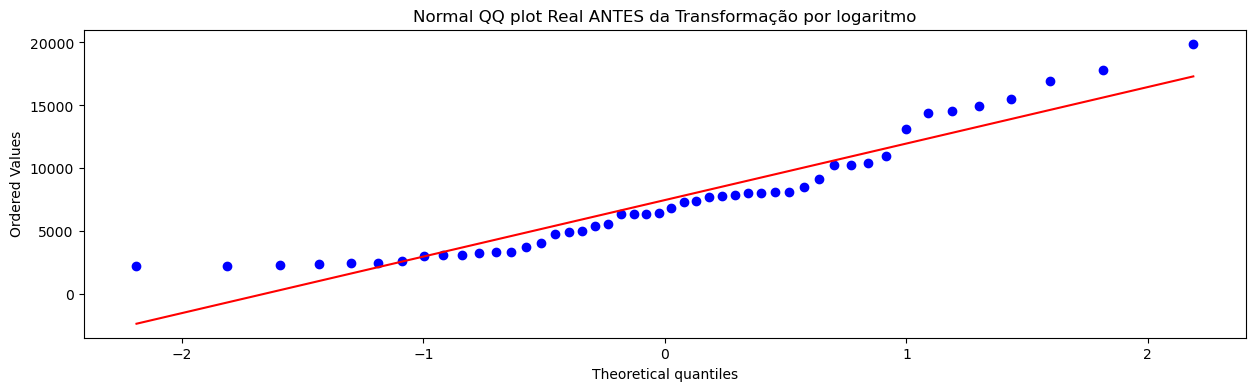

In [49]:
stats.probplot(serie_temporal1, dist="norm", plot=plt)
plt.title("Normal QQ plot Real ANTES da Transformação por logaritmo")
plt.show()

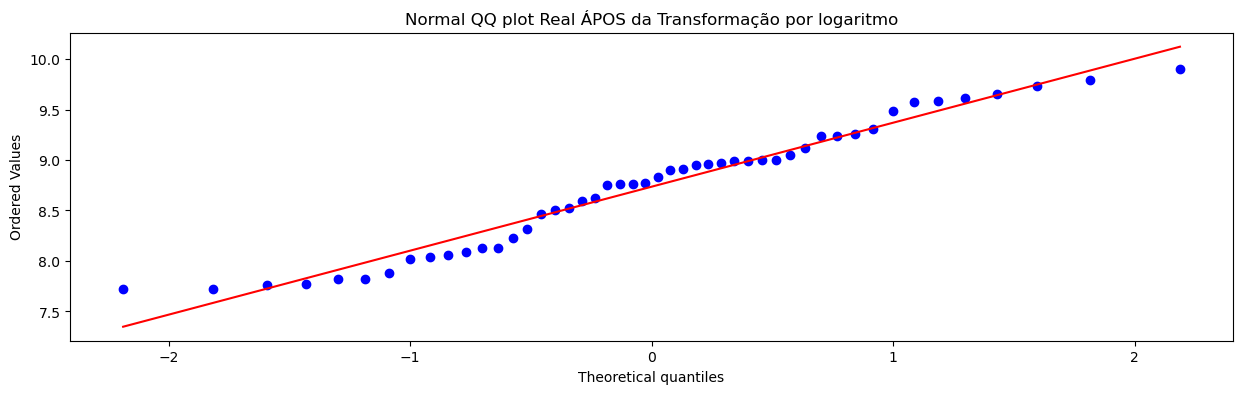

In [50]:
stats.probplot(serie_temporal2, dist="norm", plot=plt)
plt.title("Normal QQ plot Real ÁPOS da Transformação por logaritmo")
plt.show()

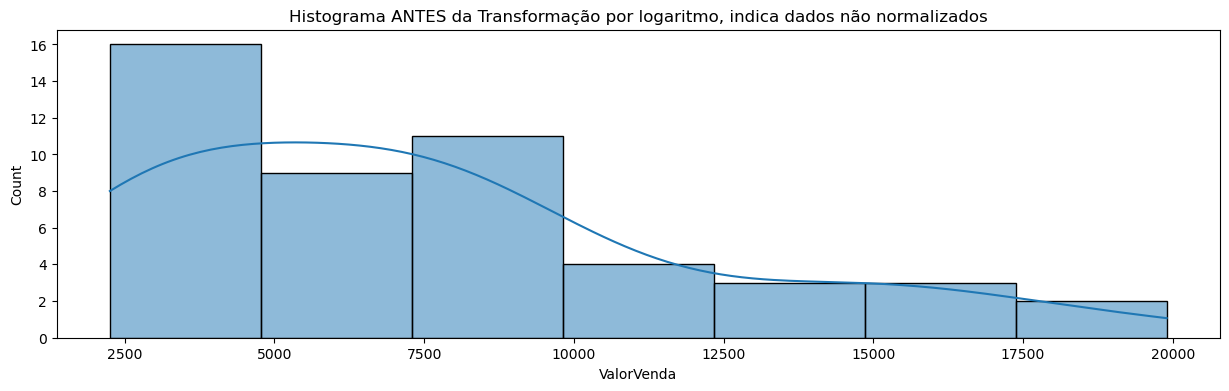

In [51]:
import seaborn as sns
sns.histplot(serie_temporal1, kde=True)
plt.title('Histograma ANTES da Transformação por logaritmo, indica dados não normalizados')
plt.show()

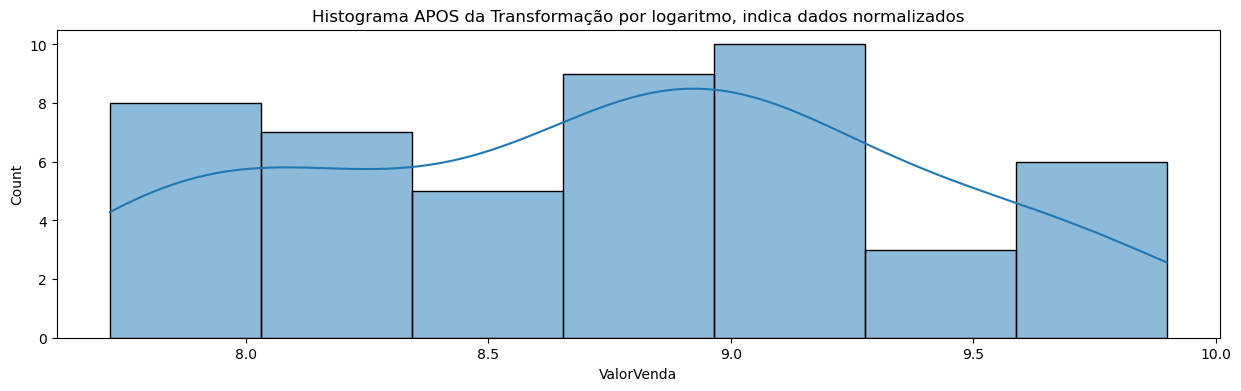

In [52]:
sns.histplot(serie_temporal2, kde=True)
plt.title('Histograma APOS da Transformação por logaritmo, indica dados normalizados')
plt.show()

**Teste de Estacionaridade APOS a transformação logaritma**

In [54]:
# Realizando o teste KPSS
kpss_result = ts.kpss(serie_temporal2)

# Exibindo os resultados do teste
print('Estatística do teste: {:.4f}'.format(kpss_result[0]))
print('p_valor: {:.4f}'.format(kpss_result[1]))
print('Valores Críticos:')

# Iterando pelos valores críticos e verificando se a série é estacionária
for chave, valor in kpss_result[3].items():
    if kpss_result[0] > valor:
        print("Não é estacionária para o nível de significância de: {}=> {:.4f}".format(chave, valor))
    else:
        print("É estacionária para o nível de significância de: {}=> {:.4f}".format(chave, valor))

Estatística do teste: 0.5948
p_valor: 0.0231
Valores Críticos:
Não é estacionária para o nível de significância de: 10%=> 0.3470
Não é estacionária para o nível de significância de: 5%=> 0.4630
Não é estacionária para o nível de significância de: 2.5%=> 0.5740
É estacionária para o nível de significância de: 1%=> 0.7390


In [55]:
# Realizando o teste Dickey-Fuller
df_result = ts.adfuller(serie_temporal2)

# Exibindo os resultados do teste
print('Estatística do teste: {:.4f}'.format(df_result[0]))
print('p_valor: {:.4f}'.format(df_result[1]))
print('Valores Críticos:')

# Iterando pelos valores críticos e verificando se a série é estacionária
for chave, valor in df_result[4].items():
    if df_result[0] < valor:  
        print("É estacionária para o nível de significância de: {} => {:.4f}".format(chave, valor))
    else:
        print("Não é estacionária para o nível de significância de: {} => {:.4f}".format(chave, valor))

Estatística do teste: -1.8732
p_valor: 0.3448
Valores Críticos:
Não é estacionária para o nível de significância de: 1% => -3.5813
Não é estacionária para o nível de significância de: 5% => -2.9268
Não é estacionária para o nível de significância de: 10% => -2.6015


**Verificado que os dados estão normalizados, porém ao aplicar os testes de estacionaridade: (KPSS e Dickey-Fuller) os dados não são estacionários**.

**A técnica de Diferenciação 
Será usada para fazer com que o modelo se torne estacionár**o.

In [58]:
serie_temporal2_diff = serie_temporal2.diff().dropna()
print(serie_temporal2_diff)

Data Venda
2012-02-29   -0.155060
2012-03-31    0.042526
2012-04-30    0.290585
2012-05-31   -0.231313
2012-06-30   -0.053521
2012-07-31    0.245710
2012-08-31    0.022921
2012-09-30    0.482567
2012-10-31   -0.436932
2012-11-30    0.235890
2012-12-31   -0.097636
2013-01-31    0.674169
2013-02-28    0.076492
2013-03-31    0.026231
2013-04-30   -0.011547
2013-05-31    0.011983
2013-06-30   -0.088910
2013-07-31    0.394863
2013-08-31   -0.838964
2013-09-30    0.153454
2013-10-31    0.615455
2013-11-30   -0.184121
2013-12-31   -0.277858
2014-01-31   -0.182031
2014-02-28    0.371244
2014-03-31   -0.206547
2014-04-30    0.001572
2014-05-31   -0.000786
2014-06-30   -0.626547
2014-07-31   -0.001178
2014-08-31   -0.410485
2014-09-30    0.103231
2014-10-31    1.128117
2014-11-30   -0.450265
2014-12-31    0.333260
2015-01-31    0.406522
2015-02-28    0.332613
2015-03-31    0.214575
2015-04-30   -0.052414
2015-05-31    0.163161
2015-06-30   -0.417712
2015-07-31    0.106812
2015-08-31   -0.332639


In [59]:
# Realizando o teste KPSS
kpss_result = ts.kpss(serie_temporal2_diff, nlags=46)

# Exibindo os resultados do teste
print('Estatística do teste: {:.4f}'.format(kpss_result[0]))
print('p_valor: {:.4f}'.format(kpss_result[1]))
print('Valores Críticos:')

# Iterando pelos valores críticos e verificando se a série é estacionária
for chave, valor in kpss_result[3].items():
    if kpss_result[0] > valor:
        print("Não é estacionária para o nível de significância de: {}=> {:.4f}".format(chave, valor))
    else:
        print("É estacionária para o nível de significância de: {}=> {:.4f}".format(chave, valor))

Estatística do teste: 0.5000
p_valor: 0.0417
Valores Críticos:
Não é estacionária para o nível de significância de: 10%=> 0.3470
Não é estacionária para o nível de significância de: 5%=> 0.4630
É estacionária para o nível de significância de: 2.5%=> 0.5740
É estacionária para o nível de significância de: 1%=> 0.7390


In [60]:
# Realizando o teste Dickey-Fuller
df_result = ts.adfuller(serie_temporal2_diff)

# Exibindo os resultados do teste
print('Estatística do teste: {:.4f}'.format(df_result[0]))
print('p_valor: {:.4f}'.format(df_result[1]))
print('Valores Críticos:')

# Iterando pelos valores críticos e verificando se a série é estacionária
for chave, valor in df_result[4].items():
    if df_result[0] < valor:  
        print("É estacionária para o nível de significância de: {} => {:.4f}".format(chave, valor))
    else:
        print("Não é estacionária para o nível de significância de: {} => {:.4f}".format(chave, valor))

Estatística do teste: -9.4552
p_valor: 0.0000
Valores Críticos:
É estacionária para o nível de significância de: 1% => -3.5813
É estacionária para o nível de significância de: 5% => -2.9268
É estacionária para o nível de significância de: 10% => -2.6015


**Autocorrelação**

In [62]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

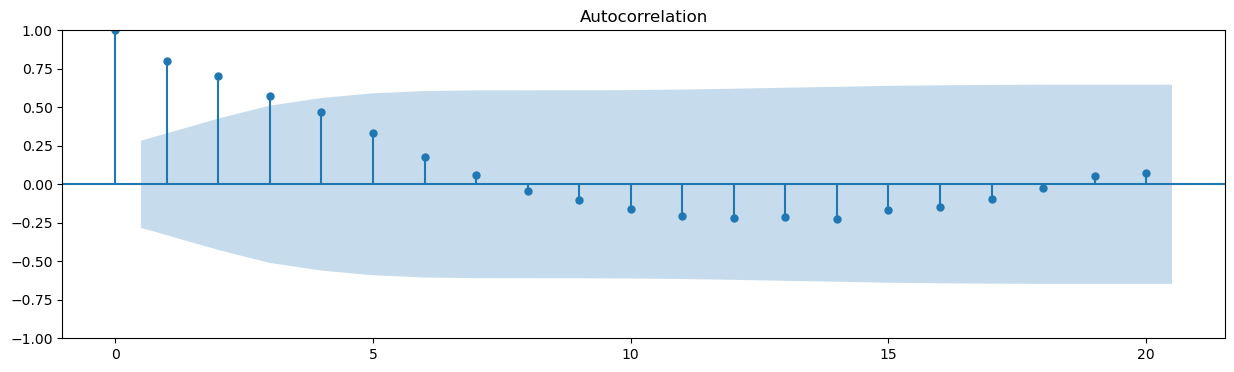

In [63]:
plot_acf(serie_temporal2, lags=20)
plt.show()

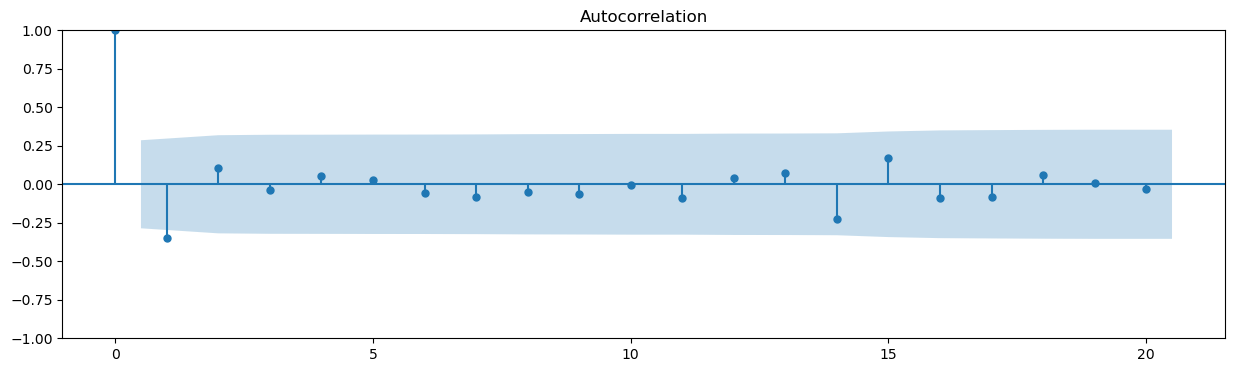

In [64]:
plot_acf(serie_temporal2_diff, lags=20)
plt.show()

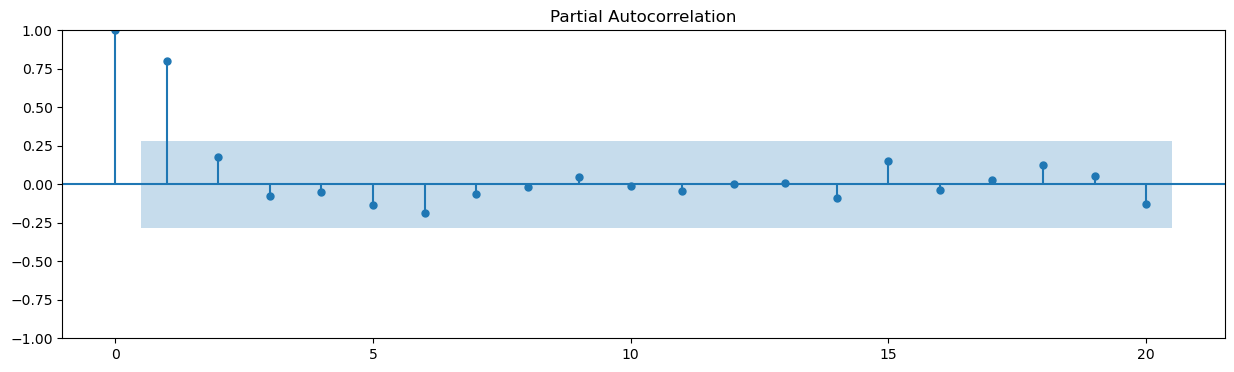

In [65]:
plot_pacf(serie_temporal2, lags=20)
plt.show()

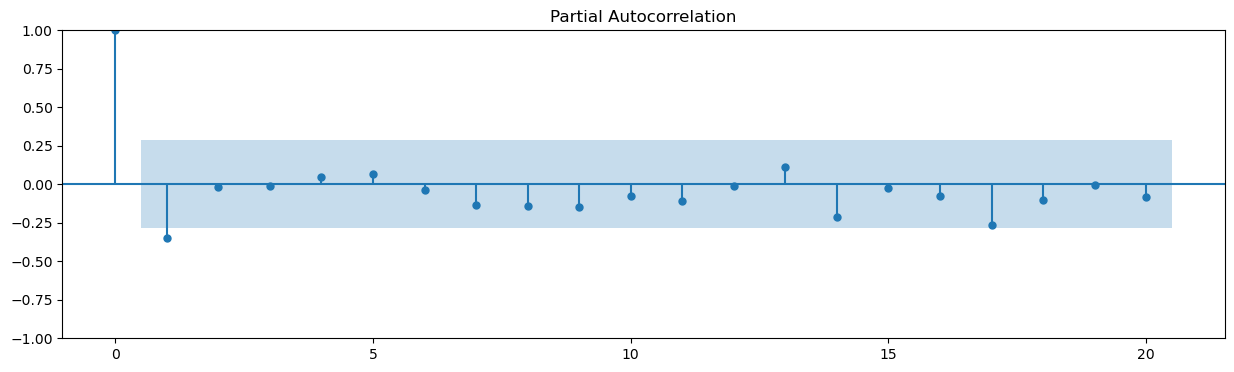

In [66]:
plot_pacf(serie_temporal2_diff, lags=20)
plt.show()

## **Modelo AUTO ARIMA**

In [68]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [69]:
from pmdarima.arima import auto_arima

In [70]:
### AUTOARIMA
# Ajustando o modelo AutoARIMA com base nos gráficos ACF e PACF
modelo_auto = auto_arima(
    serie_temporal2_diff,  # Série temporal diferenciada
    trace=True,            # Exibe informações no console
    stepwise=True,         # Busca otimizada nos parâmetros
    seasonal=True,         # Considera sazonalidade
    m=12,                  # Periodicidade sazonal (12 meses para dados mensais)
    start_p=1,             # Começa a busca para p em 1
    max_p=3,               # Limita p a um máximo de 3 (baseado no PACF)
    start_q=1,             # Começa a busca para q em 1
    max_q=3,               # Limita q a um máximo de 3 (baseado no ACF)
    start_P=0,             # Início para P (sazonal)
    max_P=2,               # Limita P sazonal a 2
    start_Q=0,             # Início para Q (sazonal)
    max_Q=2,               # Limita Q sazonal a 2
    d=1,                   # Diferenciação já aplicada (não busca d)
    D=1,                   # Componente sazonal diferencial
    max_order=10           # Limite para soma de p+q+P+Q (ajuste no desempenho)
)



Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=inf, Time=0.09 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=89.466, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=68.573, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.15 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=68.651, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=57.815, Time=0.29 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.39 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.17 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=inf, Time=0.10 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=54.906, Time=0.22 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=63.834, Time=0.08 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=0.54 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=0.18 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=54.465, Time=0.35 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=63.025, Time=0.12 sec
 AR

In [71]:
print('Melhor modelo: ', modelo_auto.aic())

Melhor modelo:  49.28987628639672


In [72]:
resultado_auto = modelo_auto.fit(serie_temporal2_diff)
print(resultado_auto.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                   47
Model:             SARIMAX(1, 1, 1)x(2, 1, [], 12)   Log Likelihood                 -19.645
Date:                             Mon, 30 Dec 2024   AIC                             49.290
Time:                                     00:31:43   BIC                             56.922
Sample:                                 02-29-2012   HQIC                            51.893
                                      - 12-31-2015                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4208      0.258     -1.630      0.103      -0.927       0.085
ma.L1         -0.8761      

**Análise dos Resíduos**

In [74]:
residuos_auto = resultado_auto.resid
residuos_auto()

Data Venda
2012-02-29   -0.155060
2012-03-31    0.197586
2012-04-30    0.248059
2012-05-31   -0.521898
2012-06-30    0.177792
2012-07-31    0.299231
2012-08-31   -0.222789
2012-09-30    0.459645
2012-10-31   -0.919498
2012-11-30    0.672822
2012-12-31   -0.333525
2013-01-31    0.771804
2013-02-28   -0.520146
2013-03-31   -0.247849
2013-04-30   -0.461462
2013-05-31    0.158308
2013-06-30    0.060962
2013-07-31    0.113054
2013-08-31   -0.843094
2013-09-30   -0.582854
2013-10-31    1.126002
2013-11-30    0.046009
2013-12-31   -0.313239
2014-01-31   -0.906151
2014-02-28    0.316519
2014-03-31    0.099894
2014-04-30   -0.091106
2014-05-31    0.213848
2014-06-30   -0.383342
2014-07-31   -0.368286
2014-08-31    0.113689
2014-09-30    0.012920
2014-10-31    1.177548
2014-11-30    0.005620
2014-12-31    0.436266
2015-01-31    0.267474
2015-02-28    0.393487
2015-03-31    0.267650
2015-04-30   -0.356873
2015-05-31    0.120093
2015-06-30   -0.257565
2015-07-31   -0.310786
2015-08-31   -0.251613


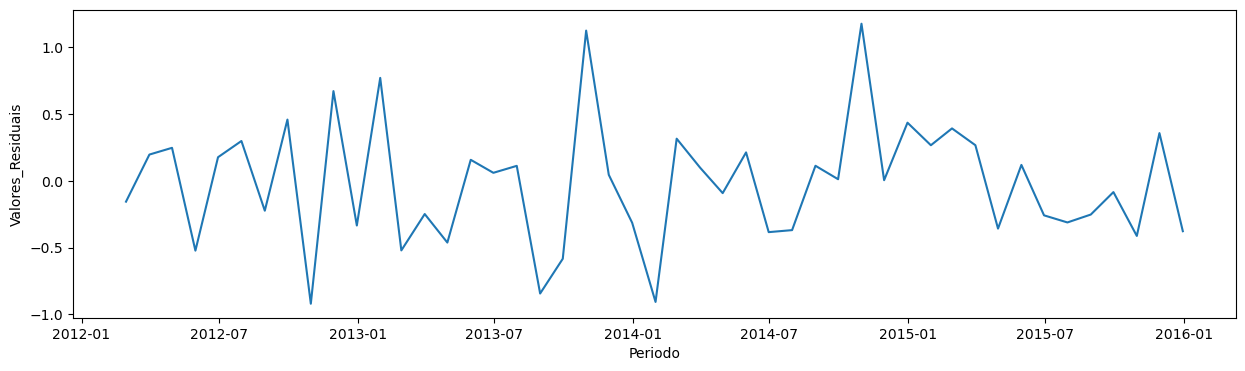

In [75]:
plt.plot(residuos_auto())
plt.xlabel('Periodo')
plt.ylabel('Valores_Residuais')
plt.show()

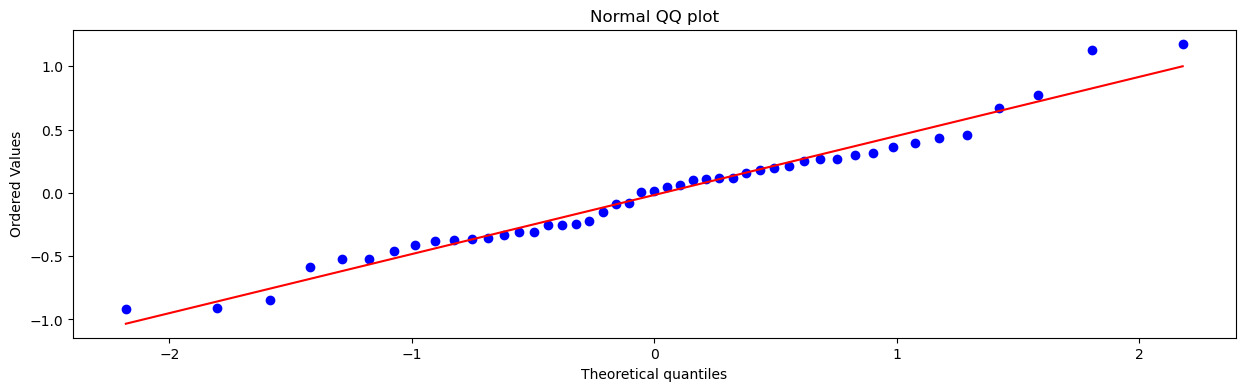

In [76]:
#Seguem uma normalidade apos a aplicação do Auto Arima
stats.probplot(residuos_auto(), dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

In [77]:
e, p = stats.shapiro(residuos_auto())
print('Estatística de teste: {}'.format(e))
print('p-valor: {}'.format(p))
# Avaliando o p-valor para decidir sobre a normalidade dos dados
if p > 0.05:
    print("Dados seguem uma distribuição normal")
else:
    print("Dados não seguem uma distribuição normal")

Estatística de teste: 0.9724480921570954
p-valor: 0.3273266064258279
Dados seguem uma distribuição normal


**Autocorrelação**

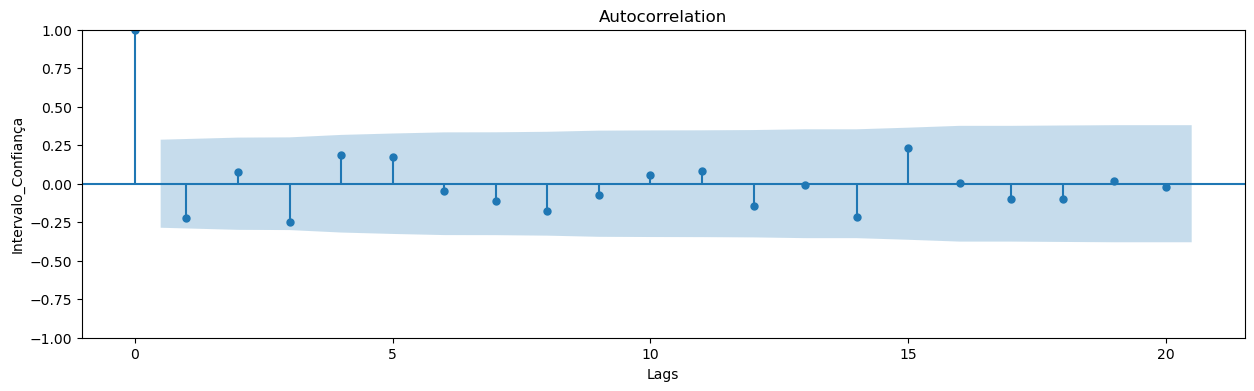

In [79]:
plot_acf(residuos_auto(), lags=20)
plt.xlabel('Lags')
plt.ylabel('Intervalo_Confiança')
plt.show()

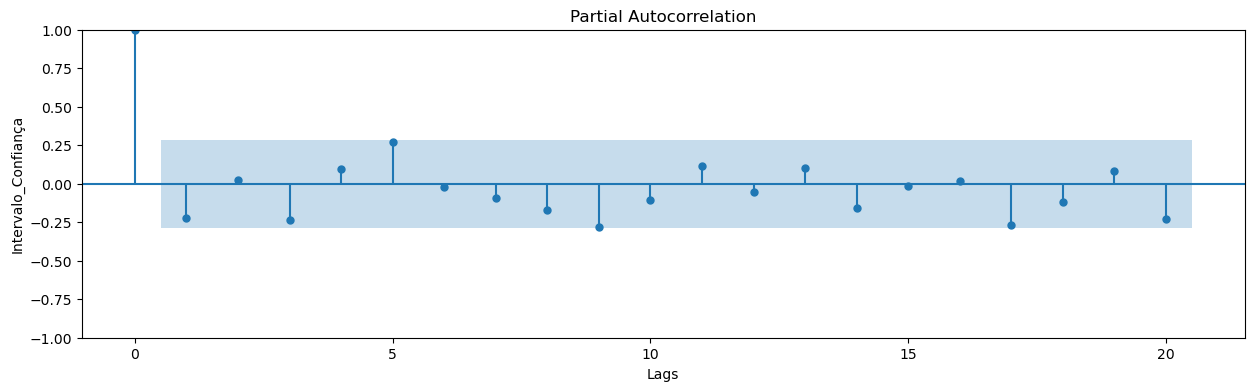

In [80]:
plot_pacf(residuos_auto(), lags=20)
plt.xlabel('Lags')
plt.ylabel('Intervalo_Confiança')
plt.show()

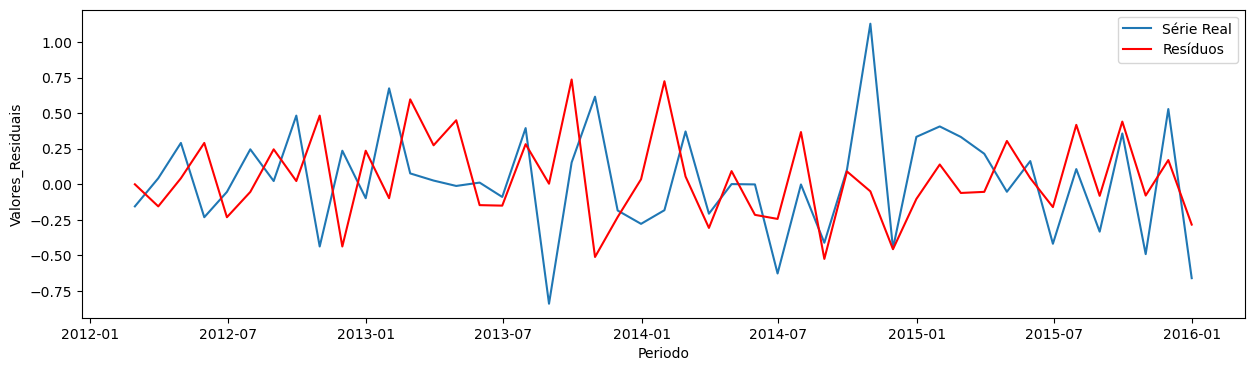

In [81]:
plt.plot(serie_temporal2_diff, label='Série Real')
plt.plot(serie_temporal2_diff-residuos_auto(),color='red', label='Resíduos')
plt.xlabel('Periodo')
plt.ylabel('Valores_Residuais')
plt.legend(loc='best')
plt.show()

In [82]:
# Realizando o teste KPSS
kpss_result = ts.kpss(residuos_auto(), nlags=46)

# Exibindo os resultados do teste
print('Estatística do teste: {:.4f}'.format(kpss_result[0]))
print('p_valor: {:.4f}'.format(kpss_result[1]))
print('Valores Críticos:')

# Iterando pelos valores críticos e verificando se a série é estacionária
for chave, valor in kpss_result[3].items():
    if kpss_result[0] > valor:
        print("Não é estacionária para o nível de significância de: {}=> {:.4f}".format(chave, valor))
    else:
        print("É estacionária para o nível de significância de: {}=> {:.4f}".format(chave, valor))

Estatística do teste: 0.5000
p_valor: 0.0417
Valores Críticos:
Não é estacionária para o nível de significância de: 10%=> 0.3470
Não é estacionária para o nível de significância de: 5%=> 0.4630
É estacionária para o nível de significância de: 2.5%=> 0.5740
É estacionária para o nível de significância de: 1%=> 0.7390


In [83]:
df_result = ts.adfuller(residuos_auto())

# Exibindo os resultados do teste
print('Estatística do teste: {:.4f}'.format(df_result[0]))
print('p_valor: {:.4f}'.format(df_result[1]))
print('Valores Críticos:')

# Iterando pelos valores críticos e verificando se a série é estacionária
for chave, valor in df_result[4].items():
    if df_result[0] < valor:  
        print("É estacionária para o nível de significância de: {} => {:.4f}".format(chave, valor))
    else:
        print("Não é estacionária para o nível de significância de: {} => {:.4f}".format(chave, valor))

Estatística do teste: -8.2804
p_valor: 0.0000
Valores Críticos:
É estacionária para o nível de significância de: 1% => -3.5813
É estacionária para o nível de significância de: 5% => -2.9268
É estacionária para o nível de significância de: 10% => -2.6015


**Previsão**

In [85]:
previsao_auto = resultado_auto.predict(n_periods=12)
previsao_auto

2016-01-31    0.688208
2016-02-29   -0.004170
2016-03-31    0.003153
2016-04-30   -0.095162
2016-05-31   -0.021470
2016-06-30   -0.274047
2016-07-31    0.238615
2016-08-31   -0.768529
2016-09-30    0.116230
2016-10-31    0.450711
2016-11-30   -0.171717
2016-12-31   -0.318951
Freq: ME, dtype: float64

## **Reversão da previsão para a escala original**

In [87]:
#Dados originais sem a diferenciação
serie_temporal1

Data Venda
2012-01-31     2636.87
2012-02-29     2258.12
2012-03-31     2356.22
2012-04-30     3150.76
2012-05-31     2500.10
2012-06-30     2369.81
2012-07-31     3029.87
2012-08-31     3100.12
2012-09-30     5022.90
2012-10-31     3244.87
2012-11-30     4108.12
2012-12-31     3725.98
2013-01-31     7311.87
2013-02-28     7893.12
2013-03-31     8102.90
2013-04-30     8009.87
2013-05-31     8106.43
2013-06-30     7416.80
2013-07-31    11007.87
2013-08-31     4757.14
2013-09-30     5546.13
2013-10-31    10263.10
2013-11-30     8537.21
2013-12-31     6466.12
2014-01-31     5390.00
2014-02-28     7813.00
2014-03-31     6355.00
2014-04-30     6365.00
2014-05-31     6360.00
2014-06-30     3399.00
2014-07-31     3395.00
2014-08-31     2252.00
2014-09-30     2496.90
2014-10-31     7715.00
2014-11-30     4918.00
2014-12-31     6863.12
2015-01-31    10305.57
2015-02-28    14372.22
2015-03-31    17812.00
2015-04-30    16902.45
2015-05-31    19898.00
2015-06-30    13103.87
2015-07-31    14581.00


In [88]:
#Dados com a diferenciação aplicada
serie_temporal2_diff

Data Venda
2012-02-29   -0.155060
2012-03-31    0.042526
2012-04-30    0.290585
2012-05-31   -0.231313
2012-06-30   -0.053521
2012-07-31    0.245710
2012-08-31    0.022921
2012-09-30    0.482567
2012-10-31   -0.436932
2012-11-30    0.235890
2012-12-31   -0.097636
2013-01-31    0.674169
2013-02-28    0.076492
2013-03-31    0.026231
2013-04-30   -0.011547
2013-05-31    0.011983
2013-06-30   -0.088910
2013-07-31    0.394863
2013-08-31   -0.838964
2013-09-30    0.153454
2013-10-31    0.615455
2013-11-30   -0.184121
2013-12-31   -0.277858
2014-01-31   -0.182031
2014-02-28    0.371244
2014-03-31   -0.206547
2014-04-30    0.001572
2014-05-31   -0.000786
2014-06-30   -0.626547
2014-07-31   -0.001178
2014-08-31   -0.410485
2014-09-30    0.103231
2014-10-31    1.128117
2014-11-30   -0.450265
2014-12-31    0.333260
2015-01-31    0.406522
2015-02-28    0.332613
2015-03-31    0.214575
2015-04-30   -0.052414
2015-05-31    0.163161
2015-06-30   -0.417712
2015-07-31    0.106812
2015-08-31   -0.332639


In [89]:
# Previsões log-transformadas (após o modelo AUTO_ARIMA e diferenciação)
previsao_auto = resultado_auto.predict(n_periods=12)
# Reverte transformação logarítmica
ultimo_valor_log = np.log(serie_temporal1.iloc[-1])  # Último valor log-transformado
previsoes_cumulativas = previsao_auto.cumsum() + ultimo_valor_log  # Soma cumulativa + último valor da serie_temporal1
previsoes_originais = np.exp(previsoes_cumulativas)  # Reverte para escala original
# Exibi resultados
print("Resultado da previsão:")
print(previsao_auto)
print("\nPrevisões cumulativas (log-transformadas):")
print(previsoes_cumulativas)
print("\nPrevisões na escala original:")
print(previsoes_originais)

Resultado da previsão:
2016-01-31    0.688208
2016-02-29   -0.004170
2016-03-31    0.003153
2016-04-30   -0.095162
2016-05-31   -0.021470
2016-06-30   -0.274047
2016-07-31    0.238615
2016-08-31   -0.768529
2016-09-30    0.116230
2016-10-31    0.450711
2016-11-30   -0.171717
2016-12-31   -0.318951
Freq: ME, dtype: float64

Previsões cumulativas (log-transformadas):
2016-01-31    9.678649
2016-02-29    9.674480
2016-03-31    9.677633
2016-04-30    9.582471
2016-05-31    9.561001
2016-06-30    9.286954
2016-07-31    9.525569
2016-08-31    8.757041
2016-09-30    8.873271
2016-10-31    9.323982
2016-11-30    9.152265
2016-12-31    8.833314
Freq: ME, dtype: float64

Previsões na escala original:
2016-01-31    15972.908445
2016-02-29    15906.446432
2016-03-31    15956.676305
2016-04-30    14508.221935
2016-05-31    14200.055442
2016-06-30    10796.252848
2016-07-31    13705.729040
2016-08-31     6355.276213
2016-09-30     7138.590192
2016-10-31    11203.501504
2016-11-30     9435.789447
201

In [90]:
previsoes_originais = pd.DataFrame(previsoes_originais)
indice_datas = pd.date_range(start='2016-01-31', periods=len(previsoes_originais), freq='ME')
previsoes_originais.index = indice_datas
previsoes_originais.columns = ['Data Venda']
previsoes_originais.columns = ['ValorVenda']
previsoes_originais

,ValorVenda
2016-01-31,15972.908445
2016-02-29,15906.446432
2016-03-31,15956.676305
2016-04-30,14508.221935
2016-05-31,14200.055442
2016-06-30,10796.252848
2016-07-31,13705.729040
2016-08-31,6355.276213
2016-09-30,7138.590192
2016-10-31,11203.501504


In [91]:
serie_temporal1 = pd.DataFrame(serie_temporal1)
indice_datas = pd.date_range(start='2012-01-31', periods=len(serie_temporal1), freq='ME')
serie_temporal1.index = indice_datas
serie_temporal1.columns = ['Data Venda']
serie_temporal1.columns = ['ValorVenda']
serie_temporal1

,ValorVenda
2012-01-31,2636.87
2012-02-29,2258.12
2012-03-31,2356.22
2012-04-30,3150.76
2012-05-31,2500.10
2012-06-30,2369.81
2012-07-31,3029.87
2012-08-31,3100.12
2012-09-30,5022.90
2012-10-31,3244.87


In [92]:
seriecomprevisao = pd.concat([serie_temporal1, previsoes_originais], axis=0,ignore_index=True)
seriecomprevisao

,ValorVenda
0,2636.870000
1,2258.120000
2,2356.220000
3,3150.760000
4,2500.100000
5,2369.810000
6,3029.870000
7,3100.120000
8,5022.900000
9,3244.870000


In [93]:
previsoes_originais.index = range(59, len(previsoes_originais)+59)
previsoes_originais

,ValorVenda
59,15972.908445
60,15906.446432
61,15956.676305
62,14508.221935
63,14200.055442
64,10796.252848
65,13705.729040
66,6355.276213
67,7138.590192
68,11203.501504


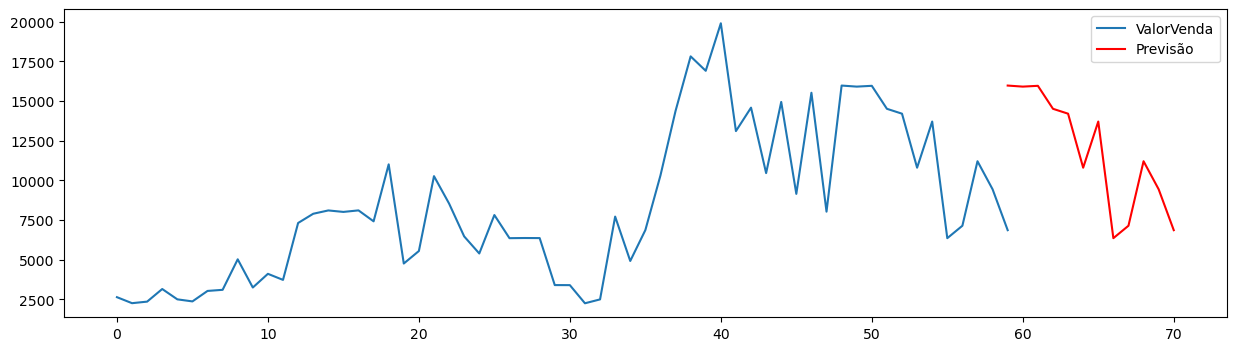

In [94]:
seriecomprevisao.plot()
plt.plot(previsoes_originais, color='red', label='Previsão')
plt.legend(loc='best')
plt.show()

In [95]:
serie_temporal1 = pd.DataFrame(serie_temporal1)
indice_datas = pd.date_range(start='2012-01-31', periods=len(serie_temporal1), freq='ME')
#serie_temporal1.index = indice_datas
serie_temporal1.columns = ['Data Venda']
serie_temporal1.columns = ['ValorVenda']
serie_temporal1

,ValorVenda
2012-01-31,2636.87
2012-02-29,2258.12
2012-03-31,2356.22
2012-04-30,3150.76
2012-05-31,2500.10
2012-06-30,2369.81
2012-07-31,3029.87
2012-08-31,3100.12
2012-09-30,5022.90
2012-10-31,3244.87


In [96]:
previsoes_originais = pd.DataFrame(previsoes_originais)
indice_datas = pd.date_range(start='2016-01-31', periods=len(previsoes_originais), freq='ME')
previsoes_originais.index = indice_datas
previsoes_originais.columns = ['Data Venda']
previsoes_originais.columns = ['ValorVenda']
previsoes_originais

,ValorVenda
2016-01-31,15972.908445
2016-02-29,15906.446432
2016-03-31,15956.676305
2016-04-30,14508.221935
2016-05-31,14200.055442
2016-06-30,10796.252848
2016-07-31,13705.729040
2016-08-31,6355.276213
2016-09-30,7138.590192
2016-10-31,11203.501504


In [97]:
seriecomprevisaoMensal = pd.concat([serie_temporal1, previsoes_originais], axis=0,ignore_index=False)
seriecomprevisaoMensal

,ValorVenda
2012-01-31,2636.870000
2012-02-29,2258.120000
2012-03-31,2356.220000
2012-04-30,3150.760000
2012-05-31,2500.100000
2012-06-30,2369.810000
2012-07-31,3029.870000
2012-08-31,3100.120000
2012-09-30,5022.900000
2012-10-31,3244.870000


In [98]:
seriecomprevisaoMensal['Data Venda'] = seriecomprevisaoMensal.index
seriecomprevisaoMensal.reset_index(drop=True, inplace=True)
seriecomprevisaoMensal

,ValorVenda,Data Venda
0,2636.870000,2012-01-31
1,2258.120000,2012-02-29
2,2356.220000,2012-03-31
3,3150.760000,2012-04-30
4,2500.100000,2012-05-31
5,2369.810000,2012-06-30
6,3029.870000,2012-07-31
7,3100.120000,2012-08-31
8,5022.900000,2012-09-30
9,3244.870000,2012-10-31


In [99]:
# Extraímos o ano criando nova variável
seriecomprevisaoMensal['Data Venda'] = seriecomprevisaoMensal['Data Venda'].dt.year
seriecomprevisaoMensal

,ValorVenda,Data Venda
0,2636.870000,2012
1,2258.120000,2012
2,2356.220000,2012
3,3150.760000,2012
4,2500.100000,2012
5,2369.810000,2012
6,3029.870000,2012
7,3100.120000,2012
8,5022.900000,2012
9,3244.870000,2012


In [100]:
#Reorganizando as colunas por 'Data Venda'.
#df = df.rename(columns={'Data Venda': 'Data_Venda', 'ValorVenda': 'Valor_Venda'})
seriecomprevisaoAnual = seriecomprevisaoMensal[['Data Venda', 'ValorVenda']]
seriecomprevisaoAnual = seriecomprevisaoMensal.rename(columns={'Data Venda':'Venda_Acumul_Anual', 'ValorVenda':'Valor_Anual_Venda'})
seriecomprevisaoAnual

,Valor_Anual_Venda,Venda_Acumul_Anual
0,2636.870000,2012
1,2258.120000,2012
2,2356.220000,2012
3,3150.760000,2012
4,2500.100000,2012
5,2369.810000,2012
6,3029.870000,2012
7,3100.120000,2012
8,5022.900000,2012
9,3244.870000,2012


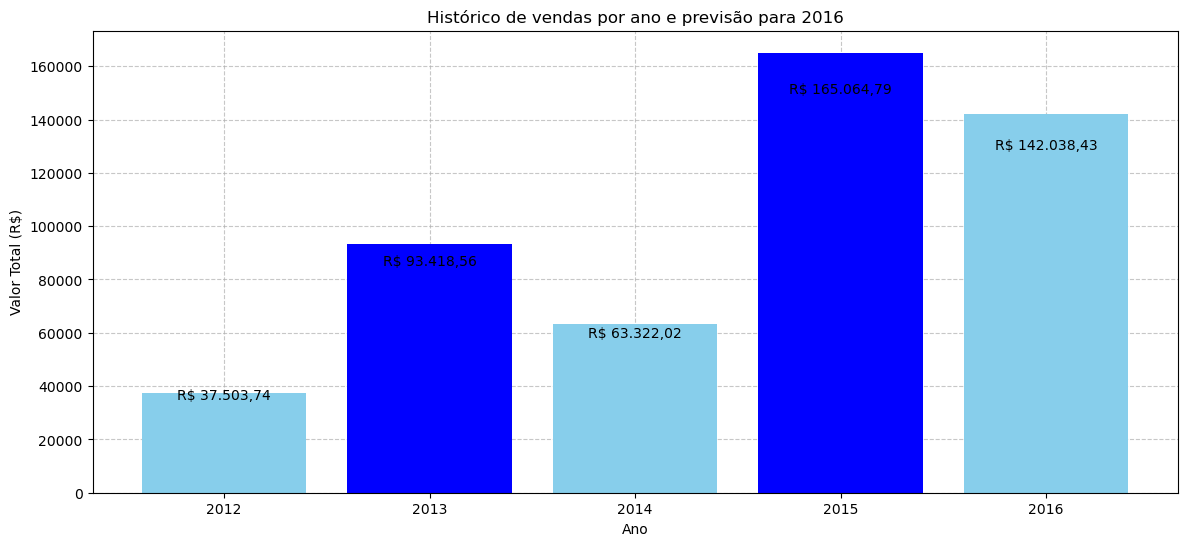

In [101]:
import locale
# Configurando o locale para o padrão monetário brasileiro
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')
# Agrupando os dados por ano e somando os valores de cada ano
dados_agrupados = seriecomprevisaoAnual.groupby('Venda_Acumul_Anual')['Valor_Anual_Venda'].sum()
# Criando uma lista de cores alternadas
cores = ['skyblue', 'blue'] * (len(dados_agrupados) // 2 + 1)
# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(14, 6))
barras = ax.bar(dados_agrupados.index, dados_agrupados.values, color=cores[:len(dados_agrupados)])
# Adicionando os valores dentro das barras, formatados como moeda brasileira
for barra in barras:
    altura = barra.get_height()
    ax.text(
        barra.get_x() + barra.get_width() / 2,           # Posição no eixo X
        altura - (altura * 0.1),                         # Posição no eixo Y
        locale.currency(altura, grouping=True),          # Texto formatado como moeda
        ha='center', va='bottom', color='black'          # Alinhamento e cor
    )
# Personalizando o gráfico
plt.title('Histórico de vendas por ano e previsão para 2016')
plt.xlabel('Ano')
plt.ylabel('Valor Total (R$)')
#Ajustando a grid para ficar atrás das linhas
ax.set_axisbelow(True)  # Coloca as grades atrás dos dados
plt.grid(True, linestyle='--', alpha=0.7)  # Ajusta o estilo e a opacidade da grade
# Exibe o gráfico
plt.show()

In [102]:
previsoes_originais['Data Venda'] = previsoes_originais.index
previsoes_originais.reset_index(drop=True, inplace=True)
previsoes_originais

,ValorVenda,Data Venda
0,15972.908445,2016-01-31
1,15906.446432,2016-02-29
2,15956.676305,2016-03-31
3,14508.221935,2016-04-30
4,14200.055442,2016-05-31
5,10796.252848,2016-06-30
6,13705.729040,2016-07-31
7,6355.276213,2016-08-31
8,7138.590192,2016-09-30
9,11203.501504,2016-10-31


In [103]:
# Convertendo a coluna 'Data Venda' para o formato datetime (se ainda não estiver)
previsoes_originais['Data Venda'] = pd.to_datetime(previsoes_originais['Data Venda'])
previsoes_originais

,ValorVenda,Data Venda
0,15972.908445,2016-01-31
1,15906.446432,2016-02-29
2,15956.676305,2016-03-31
3,14508.221935,2016-04-30
4,14200.055442,2016-05-31
5,10796.252848,2016-06-30
6,13705.729040,2016-07-31
7,6355.276213,2016-08-31
8,7138.590192,2016-09-30
9,11203.501504,2016-10-31


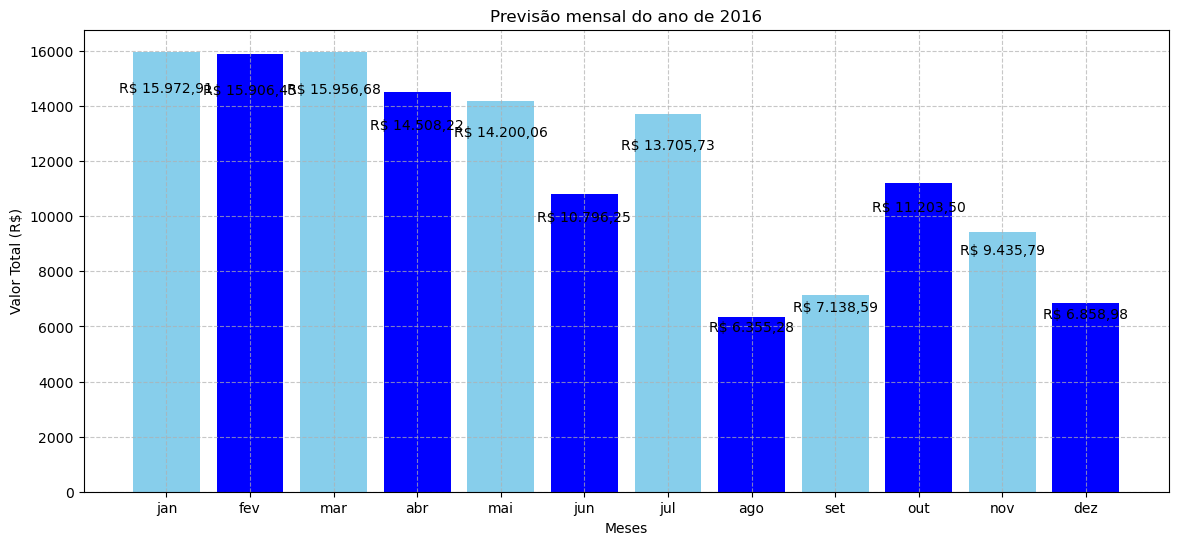

In [104]:
import locale
# Configurando o locale para o padrão monetário brasileiro
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')
# Convertendo a coluna 'Data Venda' para o formato datetime
previsoes_originais['Data Venda'] = pd.to_datetime(previsoes_originais['Data Venda'])

# Extraindo apenas o mês para exibição no gráfico
previsoes_originais['Mes'] = previsoes_originais['Data Venda'].dt.strftime('%b')

# Criando uma lista de cores alternadas
cores = ['skyblue', 'blue'] * (len(previsoes_originais) // 2 + 1)

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(14, 6))
barras = ax.bar(previsoes_originais['Mes'], previsoes_originais['ValorVenda'], color=cores[:len(previsoes_originais)])

# Adicionando os valores dentro das barras, formatados como moeda brasileira
for barra in barras:
    altura = barra.get_height()
    ax.text(
        barra.get_x() + barra.get_width() / 2,           # Posição no eixo X
        altura - (altura * 0.1),                         # Posição no eixo Y
        locale.currency(altura, grouping=True),          # Texto formatado como moeda
        ha='center', va='bottom', color='black'          # Alinhamento e cor
    )

# Personalizando o gráfico
plt.title('Previsão mensal do ano de 2016')
plt.xlabel('Meses')
plt.ylabel('Valor Total (R$)')
plt.grid(True, linestyle='--', alpha=0.7)  # Ajusta o estilo e a opacidade da grade

# Exibe o gráfico
plt.show()

In [105]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# **AVALIANDO O DESEMPENHO**

In [107]:
# Lista com valores reais de 2015
lista = [
    '10305.57',
    '14372.22',
    '17812.00',
    '16902.45',
    '19898.00',
    '13103.87',
    '14581.00',
    '10455.00',
    '14942.00',
    '9147.34',
    '15519.34',
    '8026.00']
valores_reais = pd.DataFrame(lista, columns = ['valores reais'])
print(valores_reais)


   valores reais
0       10305.57
1       14372.22
2       17812.00
3       16902.45
4       19898.00
5       13103.87
6       14581.00
7       10455.00
8       14942.00
9        9147.34
10      15519.34
11       8026.00


In [108]:
auto = previsoes_originais.iloc[0:12].reset_index(drop=True)
auto

,ValorVenda,Data Venda,Mes
0,15972.908445,2016-01-31,jan
1,15906.446432,2016-02-29,fev
2,15956.676305,2016-03-31,mar
3,14508.221935,2016-04-30,abr
4,14200.055442,2016-05-31,mai
5,10796.252848,2016-06-30,jun
6,13705.729040,2016-07-31,jul
7,6355.276213,2016-08-31,ago
8,7138.590192,2016-09-30,set
9,11203.501504,2016-10-31,out


In [109]:
auto = auto.rename(columns={'ValorVenda': 'Previsão_SARIMA'})
auto

,Previsão_SARIMA,Data Venda,Mes
0,15972.908445,2016-01-31,jan
1,15906.446432,2016-02-29,fev
2,15956.676305,2016-03-31,mar
3,14508.221935,2016-04-30,abr
4,14200.055442,2016-05-31,mai
5,10796.252848,2016-06-30,jun
6,13705.729040,2016-07-31,jul
7,6355.276213,2016-08-31,ago
8,7138.590192,2016-09-30,set
9,11203.501504,2016-10-31,out


In [110]:
desempenho = pd.concat([valores_reais, auto],axis=1)
desempenho

,valores reais,Previsão_SARIMA,Data Venda,Mes
0,10305.57,15972.908445,2016-01-31,jan
1,14372.22,15906.446432,2016-02-29,fev
2,17812.00,15956.676305,2016-03-31,mar
3,16902.45,14508.221935,2016-04-30,abr
4,19898.00,14200.055442,2016-05-31,mai
5,13103.87,10796.252848,2016-06-30,jun
6,14581.00,13705.729040,2016-07-31,jul
7,10455.00,6355.276213,2016-08-31,ago
8,14942.00,7138.590192,2016-09-30,set
9,9147.34,11203.501504,2016-10-31,out


In [111]:
desempenho = desempenho[['valores reais','Previsão_SARIMA']]
desempenho

,valores reais,Previsão_SARIMA
0,10305.57,15972.908445
1,14372.22,15906.446432
2,17812.00,15956.676305
3,16902.45,14508.221935
4,19898.00,14200.055442
5,13103.87,10796.252848
6,14581.00,13705.729040
7,10455.00,6355.276213
8,14942.00,7138.590192
9,9147.34,11203.501504


# **ERRO MÉDIO ABSOLUTO (MAE)**

In [113]:
print('ERRO MÉDIO ABSOLUTO (MAE)') # media_valor_venda
mae_sarima = mean_absolute_error(desempenho['valores reais'], desempenho['Previsão_SARIMA'])
print('SARIMA: {:.2f}'.format(mae_sarima))

try:
    print('MÉDIA: {:.2f}'.format(media_valor_venda))
except NameError:
    print('Erro: A variável "media_valor_venda" não foi definida.')
    
resultado = (lambda mae_sarima, media: 'Modelo aprovado' if mae_sarima < media else 'Modelo não aprovado')(mae_sarima, media_valor_venda)
print(resultado)


ERRO MÉDIO ABSOLUTO (MAE)
SARIMA: 3461.82
MÉDIA: 7485.61
Modelo aprovado


# **ERRO QUADRÁTICO MÉDIO (MSE)**

In [115]:
print('ERRO QUADRÁTICO MÉDIO (MSE)')
mse_sarima = mean_squared_error(desempenho['valores reais'], desempenho['Previsão_SARIMA'])
print('SARIMA: {:.2f}'.format(mse_sarima))

def calcular_media_valor_venda(media_valor_venda):
    media_valor_venda_ao_quadrado = media_valor_venda ** 2
    return media_valor_venda_ao_quadrado

try:
    media_ao_quadrado = calcular_media_valor_venda(media_valor_venda)
    print('MÉDIA: {:.2f}'.format(media_ao_quadrado))
    
    percentual_mse = (mse_sarima / media_ao_quadrado) * 100
    print('%: {:.2f}'.format(percentual_mse))

    if percentual_mse < 10:
        print('Modelo excelente')
    elif percentual_mse < 30:
        print('Modelo bom')
    elif percentual_mse < 50:
        print('Modelo razoável')
    else:
        print('Modelo rejeitado')

except NameError:
    print('Erro: A variável "media_valor_venda" não foi definida.')


ERRO QUADRÁTICO MÉDIO (MSE)
SARIMA: 16875429.88
MÉDIA: 56034304.05
%: 30.12
Modelo razoável


# **RAIZ DO ERRO QUADRÁTICO MÉDIO (RMSE)**

In [117]:
from sklearn.metrics import mean_squared_error
print('RAIZ DO ERRO QUADRÁTICO MÉDIO (RMSE)')
mse_sarima = mean_squared_error(desempenho['valores reais'], desempenho['Previsão_SARIMA'])
rmse_sarima = np.sqrt(mse_sarima)
print('SARIMA: {:.2f}'.format(rmse_sarima))

try:
    print('MÉDIA: {:.2f}'.format(media_valor_venda))
except NameError:
    print('Erro: A variável "media_valor_venda" não foi definida.')

resultado = (lambda rmse_sarima, media: 'Modelo aprovado' if rmse_sarima < media else 'Modelo não aprovado')(rmse_sarima, media_valor_venda)
print(resultado)


RAIZ DO ERRO QUADRÁTICO MÉDIO (RMSE)
SARIMA: 4107.97
MÉDIA: 7485.61
Modelo aprovado


# **ERRO PERCENTUAL MÉDIA ABSOLUTO (MAPE)**

In [119]:
print('ERRO PERCENTUAL MÉDIA ABSOLUTO (MAPE)')
desempenho.loc[:, 'valores reais'] = pd.to_numeric(desempenho['valores reais'], errors='coerce')
mape_sarima = np.mean(np.abs((desempenho['valores reais'] - desempenho['Previsão_SARIMA']) / desempenho['valores reais'])) * 100
print('SARIMA: {:.2f}%'.format(mape_sarima))

try:
    print('MÉDIA: {:.2f}'.format(media_valor_venda))
except NameError:
    print('Erro: A variável "media_valor_venda" não foi definida.')
    
if mape_sarima < 10: 
    print('Modelo excelente')
elif mape_sarima < 20: 
    print('Modelo bom')
elif mape_sarima < 50:
    print('Modelo razoável') 
else: 
    print('Modelo ruim')


ERRO PERCENTUAL MÉDIA ABSOLUTO (MAPE)
SARIMA: 25.85%
MÉDIA: 7485.61
Modelo razoável


1. Erro Médio Absoluto (MAE)
O Erro Médio Absoluto (Mean Absolute Error - MAE) é a média das diferenças absolutas entre os valores previstos e os valores reais. Em outras palavras, mede o quanto as previsões estão, em média, distantes dos valores reais.

2. Erro Quadrático Médio (MSE)
O Erro Quadrático Médio (Mean Squared Error - MSE) é a média dos quadrados das diferenças entre os valores previstos e os valores reais. Ele é útil porque penaliza erros maiores de forma mais intensa.

3. Raiz do Erro Quadrático Médio (RMSE)
A Raiz do Erro Quadrático Médio (Root Mean Squared Error - RMSE) é a raiz quadrada do MSE. Isso traz a métrica para a mesma unidade dos dados originais, facilitando a interpretação.

4. Erro Percentual Médio Absoluto (MAPE)
O Erro Percentual Médio Absoluto (Mean Absolute Percentage Error - MAPE) é a média das diferenças absolutas entre os valores previstos e os valores reais, expressa como uma porcentagem dos valores reais. É útil para entender a precisão relativa do modelo.